* Assignment 3
* Student Name : Aswani Pottathuparambil Unnikrishnan
* Student Id: 8858117

Part I

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k

In [67]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [7]:
# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Keep only 'petal width' and 'petal length' features
iris_data = iris_data[['petal length (cm)', 'petal width (cm)']]
iris_data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [13]:
iris_data.shape

(150, 2)

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [15]:
iris_data.isnull().values.any()

False

In [21]:
scaler = StandardScaler()
scaled_iris_data = scaler.fit_transform(iris_data)


In [22]:
# finding wcss value for different number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_iris_data)
    wcss.append(kmeans.inertia_)

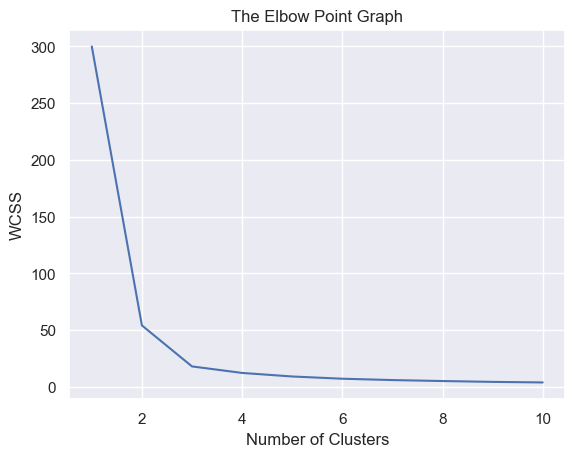

In [24]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Optimum Number of Clusters = 5

In [25]:
# Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
y_predict = kmeans.fit_predict(scaled_iris_data)
y_predict

c:\Users\aswan\AI\FML\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

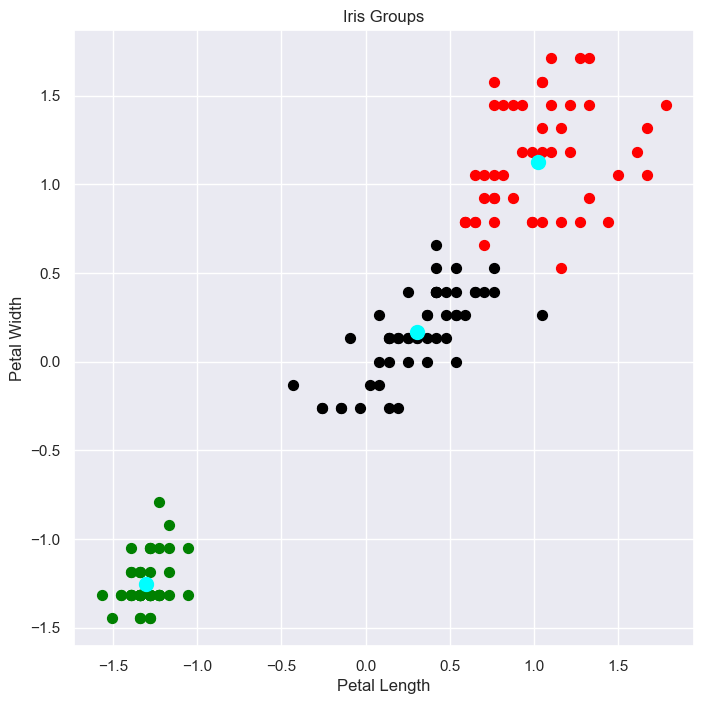

In [27]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(scaled_iris_data[y_predict==0,0], scaled_iris_data[y_predict==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(scaled_iris_data[y_predict==1,0], scaled_iris_data[y_predict==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(scaled_iris_data[y_predict==2,0], scaled_iris_data[y_predict==2,1], s=50, c='black', label='Cluster 3')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Iris Groups')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

Part II

Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   
    Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
    
    Convert text columns to numbers using label encoding / one hot encoding
    
    Apply scaling
    
    Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    
    Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

1. Load heart disease dataset in pandas dataframe

In [28]:
# Load the dataset
df = pd.read_csv('C:/Users/aswan/OneDrive/Desktop/AIML/heart.csv')

# Display 5 samples randomly
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
687,70,M,ATA,156,245,0,LVH,143,N,0.0,Up,0
709,52,M,ASY,125,212,0,Normal,168,N,1.0,Up,1
159,54,M,ATA,160,195,0,ST,130,N,1.0,Up,0
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0
614,62,M,ATA,120,254,0,LVH,93,Y,0.0,Flat,1


In [29]:
# Display the dataset size
df.shape

(918, 12)

In [30]:
# Get dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
# Check null values
df.isnull().values.any()

False

In [32]:
# Remove duplicate values
print(f'Original data set dimension: {df.shape}')
df.shape
df.drop_duplicates(inplace=True)
df.shape
print(f'Data set dimension after removing duplicates: {df.shape}')

Original data set dimension: (918, 12)
Data set dimension after removing duplicates: (918, 12)


* Observation : There is no null or duplicate values in the data set

2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [37]:
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
df = df[filter_con]

In [38]:
df.shape

(899, 12)

* There were outliers. After the removal of outliers dataset rows were reduced to 899.

3. Convert text columns to numbers using label encoding / one hot encoding

In [44]:
# text columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Do label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

C:\Users\aswan\AppData\Local\Temp\ipykernel_11676\2094690552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\aswan\AppData\Local\Temp\ipykernel_11676\2094690552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\aswan\AppData\Local\Temp\ipykernel_11676\2094690552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    int32  
 2   ChestPainType   899 non-null    int32  
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    int32  
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    int32  
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    int32  
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 73.7 KB


In [46]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


HeartDisease
1    492
0    407
Name: count, dtype: int64


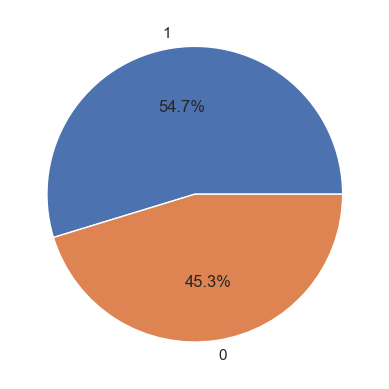

In [47]:
# Plot the diagram to check whether the dataset is balanced or not.
x = df['HeartDisease'].value_counts()
print(x)
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

There is a slight difference in average for the data for both having heart disease(54.7%) and not having the disease(45.3%). 

4. Apply scaling

In [51]:
scaler = StandardScaler()
# Splitting the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

SVM 

In [53]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred_svm_model = svm_model.predict(X_test)

In [57]:
print("\n SVM Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_svm_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_svm_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_svm_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_svm_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_svm_model)}")


 SVM Model

Accuracy :  0.8611111111111112

Confusion matrix :
 [[66 20]
 [ 5 89]]

Recall :  0.9468085106382979

Precision :  0.8165137614678899

F1 score :  0.8768472906403939


Logistic Regression

In [61]:
# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred_log_model = log_model.predict(X_test)

In [63]:
print("\n Logistic Regression Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_log_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_log_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_log_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_log_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_log_model)}")


 Logistic Regression Model

Accuracy :  0.8555555555555555

Confusion matrix :
 [[66 20]
 [ 6 88]]

Recall :  0.9361702127659575

Precision :  0.8148148148148148

F1 score :  0.8712871287128713


Random Forest 

In [64]:
rf_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [65]:
y_pred_rf_model = rf_model.predict(X_test)

In [66]:
print("\n Random Forest Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_rf_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_rf_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_rf_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_rf_model)}")

print(f"\nF1 score :  {f1_score(y_test,y_pred_rf_model)}")


 Random Forest Model

Accuracy :  0.8833333333333333

Confusion matrix :
 [[69 17]
 [ 4 90]]

Recall :  0.9574468085106383

Precision :  0.8411214953271028

F1 score :  0.8955223880597015


* Observation : 
    Random Forest Model has the highest accuracy (0.883).
    Also has a relatively high recall (0.957) and F1 score (0.896), So, we can say Random Forest Model is best for this data.

6. Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [70]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [71]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [72]:
y_pred_svm_model = svm_model.predict(X_test)

In [79]:
print("\n SVM Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_svm_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_svm_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_svm_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_svm_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_svm_model)}")


 SVM Model

Accuracy :  0.8666666666666667

Confusion matrix :
 [[68 18]
 [ 6 88]]

Recall :  0.9361702127659575

Precision :  0.8301886792452831

F1 score :  0.88


In [73]:
# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred_log_model = log_model.predict(X_test)

In [78]:
print("\n Logistic Regression Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_log_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_log_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_log_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_log_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_log_model)}")


 Logistic Regression Model

Accuracy :  0.8555555555555555

Confusion matrix :
 [[67 19]
 [ 7 87]]

Recall :  0.925531914893617

Precision :  0.8207547169811321

F1 score :  0.8700000000000001


Random Forest

In [75]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [76]:
y_pred_rf_model = rf_model.predict(X_test)

In [77]:
print("\n Random Forest Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_rf_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_rf_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_rf_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_rf_model)}")

print(f"\nF1 score :  {f1_score(y_test,y_pred_rf_model)}")


 Random Forest Model

Accuracy :  0.8444444444444444

Confusion matrix :
 [[65 21]
 [ 7 87]]

Recall :  0.925531914893617

Precision :  0.8055555555555556

F1 score :  0.8613861386138614


 Observation : 
* Accuracy of SVM and Logistic regression remains almost the same after PCA. But, Random Forest accuracy reduced after PCA. 

* The reduction in feature space may have led to a loss in predictive capacity, as seen by the fall in accuracy and F1 score after applying PCA.